---

# Ensemble Methods

**Ensemble methods** are machine learning methods that aggregate the predictions of a group of base learners in order to form a single learning model.

1. **Bagging**

2. **Random Forests**

---

## 9.1.1 Bagging

The term **bagging** referes to **b**ootstrap **agg**regating. **Bootstrapping** is a method of inferring results for a population from results found on a collection of smaller random samples of that population, using replacement during the sampling process. In the context of machine learning, a given set of machine learning model is trained respectively on random samples of training data with replacement (see the above figure), then the combined predictions of each model is **aggregated** and used as a single prediction. For regression tasks this would mean taking the average of the set of model prediction, and for classification taking the majority vote.  

Generally speaking, the models we pick for ensembling will be "dumb learners", meaning models that are barely superior to randomly guessing. Individually the models will perform poorly, but collectively will perform well. 



---

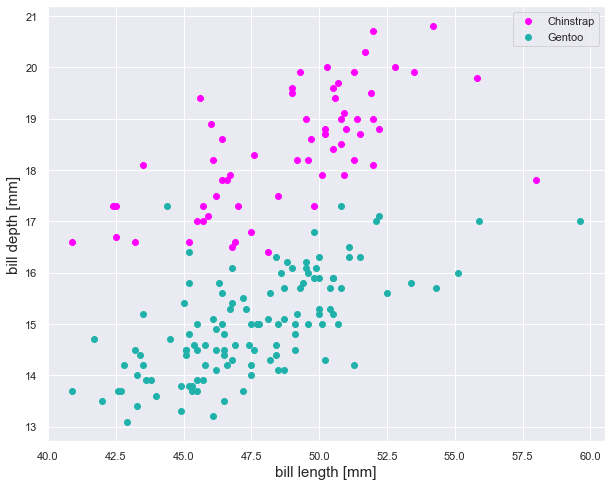

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

df = pd.read_csv("/Users/mingzeyuan/Desktop/Rice/22 Spring/INDE577/Final/Data/palmer_penguins.csv")
df = df.dropna()
df = df.iloc[152:]
X = df[["bill_length_mm", "bill_depth_mm"]].to_numpy()

def make_labels(y):
    if y == "Chinstrap":
        return 0
    else:
        return 1
         
y = df["species"].map(make_labels).to_numpy()

penguins = ["Chinstrap", "Gentoo"]
colors = ["magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(penguins, colors):
    temp_df = df[df.species == species]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.bill_depth_mm,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("bill length [mm]", fontsize = 15)
ax.set_ylabel("bill depth [mm]", fontsize = 15)
ax.legend()
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


stump_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
stump_clf.fit(X_train, y_train)
stump_y_pred = stump_clf.predict(X_test)
print(f"Stump Classification Report")
print(classification_report(y_test, stump_y_pred), "\n")


tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Stump Classification Report
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        26
           1       1.00      0.89      0.94        47

    accuracy                           0.93        73
   macro avg       0.92      0.95      0.93        73
weighted avg       0.94      0.93      0.93        73
 

Tree Classification Report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        26
           1       1.00      0.94      0.97        47

    accuracy                           0.96        73
   macro avg       0.95      0.97      0.96        73
weighted avg       0.96      0.96      0.96        73
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        26
           1       0.98      0.91      0.95        47

    accuracy                           0.93        73
   macro avg       0.92      0.94      

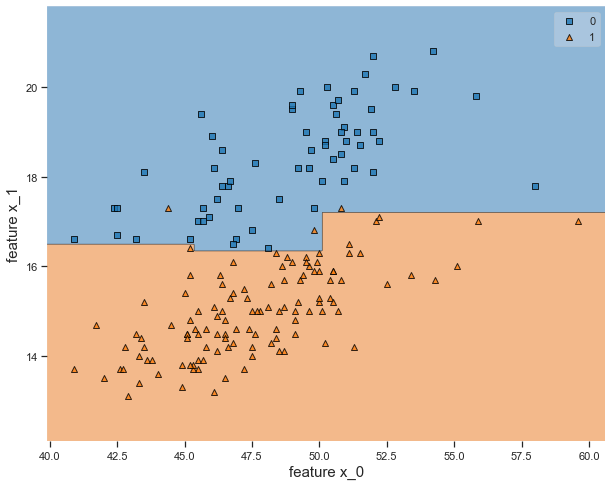

In [4]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

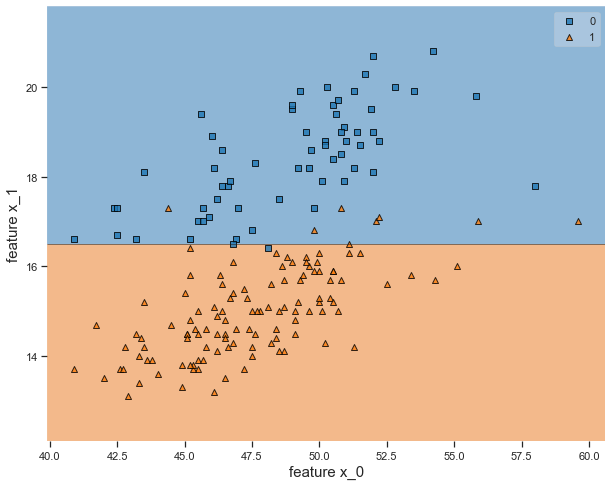

In [5]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

----

## Random Forests 
Technically speaking, the above bagging model is called a **Random forest**. Such a model exists inside the ```sklearn.ensemble``` module, and is the ```DecisionTreeClassifier``` class. However, the random forest algorithm used in training the ```RandomForestClassifier``` class introduces extra randomness when growing trees; instead of searching for the best feature when splitting a node, it searches for the best feature among a random subset of features. This results in a greater diversity of trees which results in even lower variance of the fit model. 

Run the following code cell and compare the three models. 


----

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


tree_clf = DecisionTreeClassifier(max_depth=15, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        26
           1       1.00      0.94      0.97        47

    accuracy                           0.96        73
   macro avg       0.95      0.97      0.96        73
weighted avg       0.96      0.96      0.96        73
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        26
           1       0.98      0.91      0.95        47

    accuracy                           0.93        73
   macro avg       0.92      0.94      0.93        73
weighted avg       0.94      0.93      0.93        73
 

Forest Classification Report
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        26
           1       0.98      0.91      0.95        47

    accuracy                           0.93        73
   macro avg       0.92      0.94     

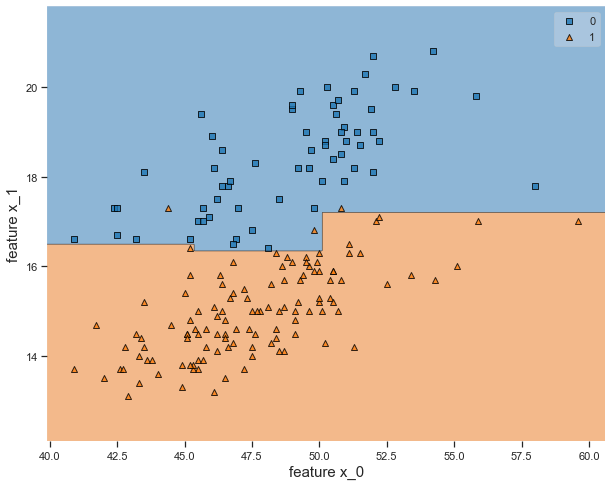

In [7]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

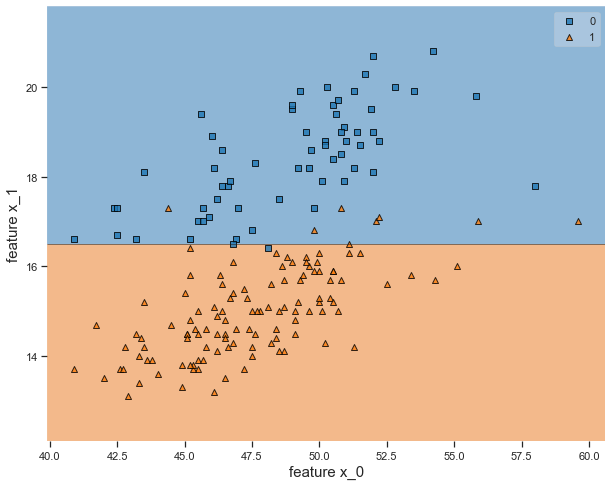

In [8]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

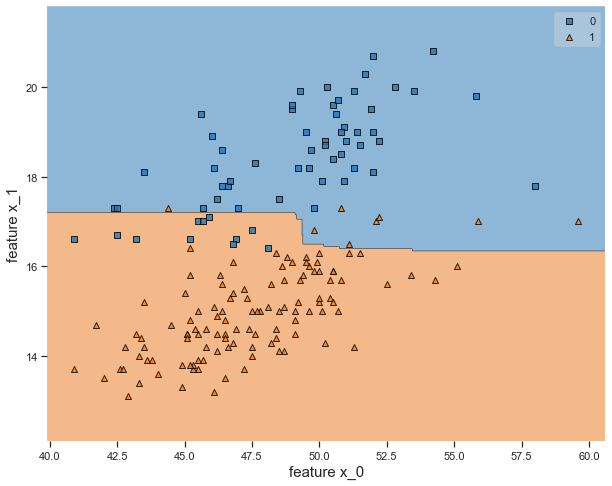

In [9]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = forest_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier

X = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 2)



tree_clf = DecisionTreeClassifier(max_depth=15, random_state=2,)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=2),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1, random_state=2)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.98      1.00      0.99        48

    accuracy                           0.99        73
   macro avg       0.99      0.98      0.98        73
weighted avg       0.99      0.99      0.99        73
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        25
           1       0.98      0.90      0.93        48

    accuracy                           0.92        73
   macro avg       0.90      0.93      0.91        73
weighted avg       0.93      0.92      0.92        73
 

Forest Classification Report
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        25
           1       0.98      0.90      0.93        48

    accuracy                           0.92        73
   macro avg       0.90      0.93     

---

## Feature Importance 

One cool thing about random forests is that these models make it simple to measure feature importance of each feature. Scikit-Learn does this by measuring a feature's importance by looking at how much the tree nodes that use that feature reduce impurity on average across all trees in the forest. For example, consider running the following code cell. 


---

In [13]:
names = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
for name, score in zip(names, forest_clf.feature_importances_):
    print(name, score)

bill_length_mm 0.0
bill_depth_mm 0.436
flipper_length_mm 0.302
body_mass_g 0.262
